<a href="https://colab.research.google.com/github/jsdae90/2019_Weather_Competition/blob/master/word2vec(cleanser).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/supportchelsea/Weather-Competition.git

Cloning into 'Weather-Competition'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [2]:
ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Jul  3 16:14 sample_data/
drwxr-xr-x 5 root root 4096 Jul 19 10:05 Weather-Competition/


In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
import pandas as pd
import numpy as np

import os
from sklearn.decomposition import PCA

In [5]:
!pip install konlpy
!pip install customized_konlpy

     |████████████████████████████████| 19.4MB 1.9MB/s 
     |████████████████████████████████| 2.7MB 34.1MB/s 
     |████████████████████████████████| 890kB 2.8MB/s 


In [0]:
#from konlpy.tag import Kkma
from konlpy.utils import pprint
#from konlpy.tag import Okt
from ckonlpy.tag import Twitter
from gensim.models import word2vec

In [0]:
# set global random seed
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True

SEED = 2019
seed_everything(SEED)

In [8]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [9]:
categories = {'네일' : ['네일', '세일'], '립컬러' : ['틴트', '립스틱','립무스', '립펜슬' ], '립케어' : ['립오일','립밤','립글로즈'], '마스크팩':['마스크팩'], '바디로션':['바디로션'], '선케어':['선크림','선스틱','선쿠션','썬크림','썬스틱','썬쿠션'], '제모제':['제모제', '왁싱패치', '제모크림', '왁스스트립'], '체중조절':['체중조절', '다이어트간식' , '다이어트바'], '크림로션':['스킨', '토너', '로션', '에센스','수분크림'], '훼이셜클렌저':['클렌징', '아이리무버', '클렌저']}
categories = [j for i in categories.values() for j in i]

twitter = Twitter()
twitter.add_dictionary(categories, 'Noun')

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
twitter.add_dictionary(['더보리스트','까띠에' ,'브라이트닝', '닥터림스', '알로에', '네이처 리퍼블릭','기능성','랄라블라','디오프러스', '리무버', '아이소이','리리코스' ,'마린 소프트 포밍','아야라야','자개네일', '립앤아이', '어퓨',
                       '테라크네','테라비코스'], 'Noun')

In [10]:
path = 'Weather-Competition/sns data/'
os.listdir(path)

['cleanser_2018.csv',
 'nail_2018.csv',
 'mask_2018.csv',
 'lipcolor_2018.csv',
 'suncare_2018.csv',
 'creamlotion_2018.csv',
 'lipcare_2018.csv',
 'diet_2018.csv',
 'lalavla_2018.csv',
 'hairremoval_2018.csv',
 'bodylotion_2018.csv']

In [0]:
cleanser = pd.read_csv(path+'cleanser_2018.csv').iloc[:, 1:]

In [0]:
a = []
for i in cleanser.columns:
  a.append(str(i).replace("-",""))

In [0]:
cleanser.columns = a

In [0]:
high_temp = [20180802.0, 20180801.0, 20180803.0, 20180731.0, 20180730.0, 20180815.0, 20180814.0, 20180729.0, 20180723.0, 20180724.0, 20180722.0, 20180804.0, 20180808.0, 20180727.0, 20180810.0, 20180807.0, 20180813.0, 20180811.0, 20180812.0, 20180806.0]
high_temp = [str(i)[:-2] for i in high_temp]

In [0]:
low_temp = [20180203.0, 20181209.0, 20181229.0, 20180110.0, 20181230.0, 20181208.0, 20180129.0, 20180207.0, 20180205.0, 20180204.0, 20181227.0, 20180206.0, 20180112.0, 20181228.0, 20180127.0, 20180111.0, 20180123.0, 20180125.0, 20180124.0, 20180126.0]
low_temp = [str(i)[:-2] for i in low_temp]

In [0]:
high_hu = [20180517.0, 20180701.0, 20180828.0, 20180702.0, 20181108.0, 20180516.0, 20180827.0, 20180315.0, 20180423.0, 20180512.0, 20181203.0, 20180921.0, 20180626.0, 20180824.0, 20180502.0, 20180710.0, 20180405.0, 20180829.0, 20180304.0, 20180506.0] 
high_hu = [str(i)[:-2] for i in high_hu]

In [0]:
low_hu = [20180128.0, 20181128.0, 20181226.0, 20180205.0, 20180206.0, 20180412.0, 20180126.0, 20181228.0, 20181208.0, 20181207.0, 20181209.0, 20180125.0, 20180221.0, 20180218.0, 20180124.0, 20181229.0, 20180215.0, 20180413.0, 20180217.0, 20181227.0]
low_hu = [str(i)[:-2] for i in low_hu]

In [0]:
rainy = [20180122.0, 20180223.0, 20180228.0, 20180301.0, 20180304.0, 20180305.0, 20180308.0, 20180315.0, 20180318.0, 20180319.0, 20180321.0, 20180404.0, 20180405.0, 20180406.0, 20180408.0, 20180410.0,
         20180414.0, 20180422.0, 20180423.0, 20180424.0, 20180502.0, 20180503.0, 20180506.0, 20180512.0, 20180516.0, 20180517.0, 20180518.0, 20180522.0, 20180523.0, 20180529.0, 20180530.0, 20180609.0, 20180610.0, 20180611.0,
         20180614.0, 20180615.0, 20180626.0, 20180628.0, 20180629.0, 20180630.0, 20180701.0, 20180702.0, 20180703.0, 20180705.0, 20180709.0, 20180710.0, 20180711.0, 20180728.0, 20180805.0, 20180806.0, 20180809.0, 20180812.0, 20180813.0,
         20180815.0, 20180821.0, 20180823.0, 20180824.0, 20180826.0, 20180827.0, 20180828.0, 20180829.0, 20180830.0, 20180903.0, 20180906.0, 20180907.0, 20180915.0, 20180916.0, 20180920.0, 20180921.0, 20180922.0, 20181005.0, 20181006.0,
         20181010.0, 20181023.0, 20181026.0, 20181028.0, 20181107.0, 20181108.0, 20181121.0, 20181124.0, 20181203.0, 20181204.0]
rainy = [str(i)[:-2] for i in rainy]

In [0]:
cleanser_high_temp = cleanser[high_temp]
cleanser_low_temp = cleanser[low_temp]
cleanser_high_hu = cleanser[high_hu]
cleanser_low_hu = cleanser[low_hu]
cleanser_rainy = cleanser[rainy]

In [0]:
# 높은 온도
list_corpus_1 = []
for date in cleanser_high_temp.columns:
  
  for unit in cleanser_high_temp[date].dropna().tolist():
  
    #unit = unit.replace('선크림', '썬크림').replace('선스틱', '썬스틱') 
    temp_corpus = twitter.pos(unit)

    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]

    list_corpus_1.append(temp_corpus)

In [0]:
# 낮은 온도
list_corpus_2 = []
for date in cleanser_low_temp.columns:
  
  for unit in cleanser_low_temp[date].dropna().tolist():
  
    unit = unit.replace('선크림', '썬크림').replace('선스틱', '썬스틱') 
    temp_corpus = twitter.pos(unit)

    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]

    list_corpus_2.append(temp_corpus)

In [0]:
# 높은 습도
list_corpus_3 = []
for date in cleanser_high_hu.columns:
  
  for unit in cleanser_high_hu[date].dropna().tolist():
  
    unit = unit.replace('선크림', '썬크림').replace('선스틱', '썬스틱') 
    temp_corpus = twitter.pos(unit)

    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]

    list_corpus_3.append(temp_corpus)

In [0]:
# 낮은 습도
list_corpus_4 = []
for date in cleanser_low_hu.columns:
  
  for unit in cleanser_low_hu[date].dropna().tolist():
  
    unit = unit.replace('선크림', '썬크림').replace('선스틱', '썬스틱') 
    temp_corpus = twitter.pos(unit)

    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]

    list_corpus_4.append(temp_corpus)

In [0]:
# 비오는 날
list_corpus_5 = []
for date in cleanser_rainy.columns:
  
  for unit in cleanser_rainy[date].dropna().tolist():
  
    unit = unit.replace('선크림', '썬크림').replace('선스틱', '썬스틱') 
    temp_corpus = twitter.pos(unit)

    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]

    list_corpus_5.append(temp_corpus)

In [0]:
# 높은 온도
remove_list = ['마키', '얼티', '우리', '처럼', '애매', '샀음', '이치', '집애', '거나', '님덜', '오오오', '당분간', '근래', '더러', '낫다', '좀더', '세상', '흐그규', '오오오', '크루', '삿음', '표현', '다소',
              '나신', '이바', '갈라', '큐션', '파라', '구차', '마스터', '은데', '어피', '라이트닝', '완판', '가장', '홈쇼핑', '세이프', '선착순', '한정판', '사면', '포스터', '영상', '사원', '백호', '런칭', 
              '뉴이스트', '리페', '센텔', '블루', '교환', '핫딜', '한정', '메이킹', '뮤료', '혜택', '확인', '라비', '엑소', '태연', '브로마이드', '리뷰', '린지', '찬스', '카이', '티크', '진행중', '백현', '애프터',
              '리뷰', '무료', '우리동네', '이지', '아보', '라오', '고민', '가기', '상태', '지나', '대박', '기도', '지우', '절대', '가능', '웃기', '난리', '최고','진짜','이나','하나','보고','더니','오늘','포피','요즘','지금',
              '이요','싸이','부터','하니','다가','까지','케이','려면','나라','신천지','한기총','자차','비아그라','양으로','어서','어요','그냥','때문','면서','바스','해주','하루','코르셋','베이비','무기','대한민국','다누리',
               '발라','레오','님들','느낌','아무','이번','정도','그거','해도','어가','아주','완전','마다','거의','일단','존나','이제','시작','시간','사실','정말','달라','래서','다행','먹기','거기','다른','사고','아아',
              '지드래곤','누가','인피니트','빅뱅','오프','근처','랩노','투표','옹성','성열','황민','에스','저희','최애','다라','예전','부랄','가세','나중','자꾸','세븐','마크','스타','바로','재민','졸라','미미','이승기','끝내','내일','무슨',
              '함무라비','팔로','최근','묭묭','이제','힘내','브이','도대체','약간','어제','오지','위협','자주','보신','신가','어디','동안','과자','현빈','드릴','가요','계속','판타지','아하','송지효','청와대','진정',
              '안주','파파','리얼','무배','바이','멜로','젤리','아이크','아침','오랜만','환율','려고']

cleaning_list_corpus = []
for corpus in list_corpus_1:
  temp_corpus = pd.Series(corpus)[~pd.Series(corpus).isin(remove_list)].tolist()
  
  if len(temp_corpus)>2:
    cleaning_list_corpus.append(temp_corpus)

In [0]:
# 낮은 온도
remove_list = ['마키', '얼티', '우리', '처럼', '애매', '샀음', '이치', '집애', '거나', '님덜', '오오오', '당분간', '근래', '더러', '낫다', '좀더', '세상', '흐그규', '오오오', '크루', '삿음', '표현', '다소',
              '나신', '이바', '갈라', '큐션', '파라', '구차', '마스터', '은데', '어피', '라이트닝', '완판', '가장', '홈쇼핑', '세이프', '선착순', '한정판', '사면', '포스터', '영상', '사원', '백호', '런칭', 
              '뉴이스트', '리페', '센텔', '블루', '교환', '핫딜', '한정', '메이킹', '뮤료', '혜택', '확인', '라비', '엑소', '태연', '브로마이드', '리뷰', '린지', '찬스', '카이', '티크', '진행중', '백현', '애프터',
              '리뷰', '무료', '우리동네', '이지', '아보', '라오', '고민', '가기', '상태', '지나', '대박', '기도', '지우', '절대', '가능', '웃기', '난리', '최고','진짜','이나','하나','보고','더니','오늘','포피','요즘','지금',
              '이요','싸이','부터','하니','다가','까지','케이','려면','나라','신천지','한기총','자차','비아그라','양으로','어서','어요','그냥','때문','면서','바스','해주','하루','코르셋','베이비','무기','대한민국','다누리',
               '발라','레오','님들','느낌','아무','이번','정도','그거','해도','어가','아주','완전','마다','거의','일단','존나','이제','시작','시간','사실','정말','달라','래서','다행','먹기','거기','다른','사고','아아',
              '지드래곤','누가','인피니트','빅뱅','오프','근처','랩노','투표','옹성','성열','황민','에스','저희','최애','다라','예전','부랄','가세','나중','자꾸','세븐','마크','스타','바로','재민','졸라','미미','이승기','끝내','내일','무슨',
              '함무라비','팔로','최근','묭묭','이제','힘내','브이','도대체','약간','어제','오지','위협','자주','보신','신가','어디','동안','과자','현빈','드릴','가요','계속','판타지','아하','송지효','청와대','진정',
              '안주','파파','리얼','무배','바이','멜로','젤리','아이크','아침','오랜만','환율','려고']


cleaning_list_corpus = []
for corpus in list_corpus_2:
  temp_corpus = pd.Series(corpus)[~pd.Series(corpus).isin(remove_list)].tolist()
  
  if len(temp_corpus)>2:
    cleaning_list_corpus.append(temp_corpus)

In [0]:
# 높은 습도
remove_list = ['마키', '얼티', '우리', '처럼', '애매', '샀음', '이치', '집애', '거나', '님덜', '오오오', '당분간', '근래', '더러', '낫다', '좀더', '세상', '흐그규', '오오오', '크루', '삿음', '표현', '다소',
              '나신', '이바', '갈라', '큐션', '파라', '구차', '마스터', '은데', '어피', '라이트닝', '완판', '가장', '홈쇼핑', '세이프', '선착순', '한정판', '사면', '포스터', '영상', '사원', '백호', '런칭', 
              '뉴이스트', '리페', '센텔', '블루', '교환', '핫딜', '한정', '메이킹', '뮤료', '혜택', '확인', '라비', '엑소', '태연', '브로마이드', '리뷰', '린지', '찬스', '카이', '티크', '진행중', '백현', '애프터',
              '리뷰', '무료', '우리동네', '이지', '아보', '라오', '고민', '가기', '상태', '지나', '대박', '기도', '지우', '절대', '가능', '웃기', '난리', '최고','진짜','이나','하나','보고','더니','오늘','포피','요즘','지금',
              '이요','싸이','부터','하니','다가','까지','케이','려면','나라','신천지','한기총','자차','비아그라','양으로','어서','어요','그냥','때문','면서','바스','해주','하루','코르셋','베이비','무기','대한민국','다누리',
               '발라','레오','님들','느낌','아무','이번','정도','그거','해도','어가','아주','완전','마다','거의','일단','존나','이제','시작','시간','사실','정말','달라','래서','다행','먹기','거기','다른','사고','아아',
              '지드래곤','누가','인피니트','빅뱅','오프','근처','랩노','투표','옹성','성열','황민','에스','저희','최애','다라','예전','부랄','가세','나중','자꾸','세븐','마크','스타','바로','재민','졸라','미미','이승기','끝내','내일','무슨',
              '함무라비','팔로','최근','묭묭','이제','힘내','브이','도대체','약간','어제','오지','위협','자주','보신','신가','어디','동안','과자','현빈','드릴','가요','계속','판타지','아하','송지효','청와대','진정',
              '안주','파파','리얼','무배','바이','멜로','젤리','아이크','아침','오랜만','환율','려고']

cleaning_list_corpus =[]
for corpus in list_corpus_3:
  temp_corpus = pd.Series(corpus)[~pd.Series(corpus).isin(remove_list)].tolist()
  
  if len(temp_corpus)>2:
    cleaning_list_corpus.append(temp_corpus)

In [0]:
# 낮은 습도
remove_list = ['마키', '얼티', '우리', '처럼', '애매', '샀음', '이치', '집애', '거나', '님덜', '오오오', '당분간', '근래', '더러', '낫다', '좀더', '세상', '흐그규', '오오오', '크루', '삿음', '표현', '다소',
              '나신', '이바', '갈라', '큐션', '파라', '구차', '마스터', '은데', '어피', '라이트닝', '완판', '가장', '홈쇼핑', '세이프', '선착순', '한정판', '사면', '포스터', '영상', '사원', '백호', '런칭', 
              '뉴이스트', '리페', '센텔', '블루', '교환', '핫딜', '한정', '메이킹', '뮤료', '혜택', '확인', '라비', '엑소', '태연', '브로마이드', '리뷰', '린지', '찬스', '카이', '티크', '진행중', '백현', '애프터',
              '리뷰', '무료', '우리동네', '이지', '아보', '라오', '고민', '가기', '상태', '지나', '대박', '기도', '지우', '절대', '가능', '웃기', '난리', '최고','진짜','이나','하나','보고','더니','오늘','포피','요즘','지금',
              '이요','싸이','부터','하니','다가','까지','케이','려면','나라','신천지','한기총','자차','비아그라','양으로','어서','어요','그냥','때문','면서','바스','해주','하루','코르셋','베이비','무기','대한민국','다누리',
               '발라','레오','님들','느낌','아무','이번','정도','그거','해도','어가','아주','완전','마다','거의','일단','존나','이제','시작','시간','사실','정말','달라','래서','다행','먹기','거기','다른','사고','아아',
              '지드래곤','누가','인피니트','빅뱅','오프','근처','랩노','투표','옹성','성열','황민','에스','저희','최애','다라','예전','부랄','가세','나중','자꾸','세븐','마크','스타','바로','재민','졸라','미미','이승기','끝내','내일','무슨',
              '함무라비','팔로','최근','묭묭','이제','힘내','브이','도대체','약간','어제','오지','위협','자주','보신','신가','어디','동안','과자','현빈','드릴','가요','계속','판타지','아하','송지효','청와대','진정',
              '안주','파파','리얼','무배','바이','멜로','젤리','아이크','아침','오랜만','환율','려고']

cleaning_list_corpus =[]
for corpus in list_corpus_4:
  temp_corpus = pd.Series(corpus)[~pd.Series(corpus).isin(remove_list)].tolist()
  
  if len(temp_corpus)>2:
    cleaning_list_corpus.append(temp_corpus)

In [0]:
# 비오는 날
remove_list = ['마키', '얼티', '우리', '처럼', '애매', '샀음', '이치', '집애', '거나', '님덜', '오오오', '당분간', '근래', '더러', '낫다', '좀더', '세상', '흐그규', '오오오', '크루', '삿음', '표현', '다소',
              '나신', '이바', '갈라', '큐션', '파라', '구차', '마스터', '은데', '어피', '라이트닝', '완판', '가장', '홈쇼핑', '세이프', '선착순', '한정판', '사면', '포스터', '영상', '사원', '백호', '런칭', 
              '뉴이스트', '리페', '센텔', '블루', '교환', '핫딜', '한정', '메이킹', '뮤료', '혜택', '확인', '라비', '엑소', '태연', '브로마이드', '리뷰', '린지', '찬스', '카이', '티크', '진행중', '백현', '애프터',
              '리뷰', '무료', '우리동네', '이지', '아보', '라오', '고민', '가기', '상태', '지나', '대박', '기도', '지우', '절대', '가능', '웃기', '난리', '최고','진짜','이나','하나','보고','더니','오늘','포피','요즘','지금',
              '이요','싸이','부터','하니','다가','까지','케이','려면','나라','신천지','한기총','자차','비아그라','양으로','어서','어요','그냥','때문','면서','바스','해주','하루','코르셋','베이비','무기','대한민국','다누리',
               '발라','레오','님들','느낌','아무','이번','정도','그거','해도','어가','아주','완전','마다','거의','일단','존나','이제','시작','시간','사실','정말','달라','래서','다행','먹기','거기','다른','사고','아아',
              '지드래곤','누가','인피니트','빅뱅','오프','근처','랩노','투표','옹성','성열','황민','에스','저희','최애','다라','예전','부랄','가세','나중','자꾸','세븐','마크','스타','바로','재민','졸라','미미','이승기','끝내','내일','무슨',
              '함무라비','팔로','최근','묭묭','이제','힘내','브이','도대체','약간','어제','오지','위협','자주','보신','신가','어디','동안','과자','현빈','드릴','가요','계속','판타지','아하','송지효','청와대','진정',
              '안주','파파','리얼','무배','바이','멜로','젤리','아이크','아침','오랜만','환율','려고']

cleaning_list_corpus = []
for corpus in list_corpus_5:
  temp_corpus = pd.Series(corpus)[~pd.Series(corpus).isin(remove_list)].tolist()
  
  if len(temp_corpus)>2:
    cleaning_list_corpus.append(temp_corpus)

In [0]:
item_list_clean = pd.Series([j  for i in cleaning_list_corpus for j in i]).value_counts()[pd.Series([j  for i in cleaning_list_corpus for j in i]).value_counts()>15].index

In [0]:
#pd.Series([j  for i in cleaning_list_corpus for j in i]).value_counts()[pd.Series([j  for i in cleaning_list_corpus for j in i]).value_counts()>10].index

In [0]:
cleaning_list_corpus2 = []
for corpus in cleaning_list_corpus:
  temp_corpus = pd.Series(corpus)[pd.Series(corpus).isin(item_list_clean)].tolist()
  
  if len(temp_corpus)>2:
    cleaning_list_corpus2.append(temp_corpus)

In [65]:
word2vec_model = word2vec.Word2Vec(cleaning_list_corpus2, min_count=15)
word2vec_model.most_similar('클렌저', topn=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('세안', 0.9998102188110352),
 ('보습', 0.9997953772544861),
 ('각질', 0.9997929930686951),
 ('메이크업', 0.99979168176651),
 ('크림', 0.9997811913490295),
 ('피지', 0.9997730851173401),
 ('트러블', 0.9997665882110596),
 ('피부', 0.9997652769088745),
 ('토너', 0.9997619390487671),
 ('세트', 0.9997608065605164),
 ('오일', 0.9997531771659851),
 ('자극', 0.999748170375824),
 ('기초', 0.9997475147247314),
 ('사용', 0.9997400045394897),
 ('여드름', 0.9997355341911316),
 ('맞팔', 0.9997347593307495),
 ('아이리무버', 0.9997341632843018),
 ('제품', 0.9997327327728271),
 ('로션', 0.9997278451919556),
 ('추천', 0.9997224807739258)]

In [66]:
X = word2vec_model[word2vec_model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

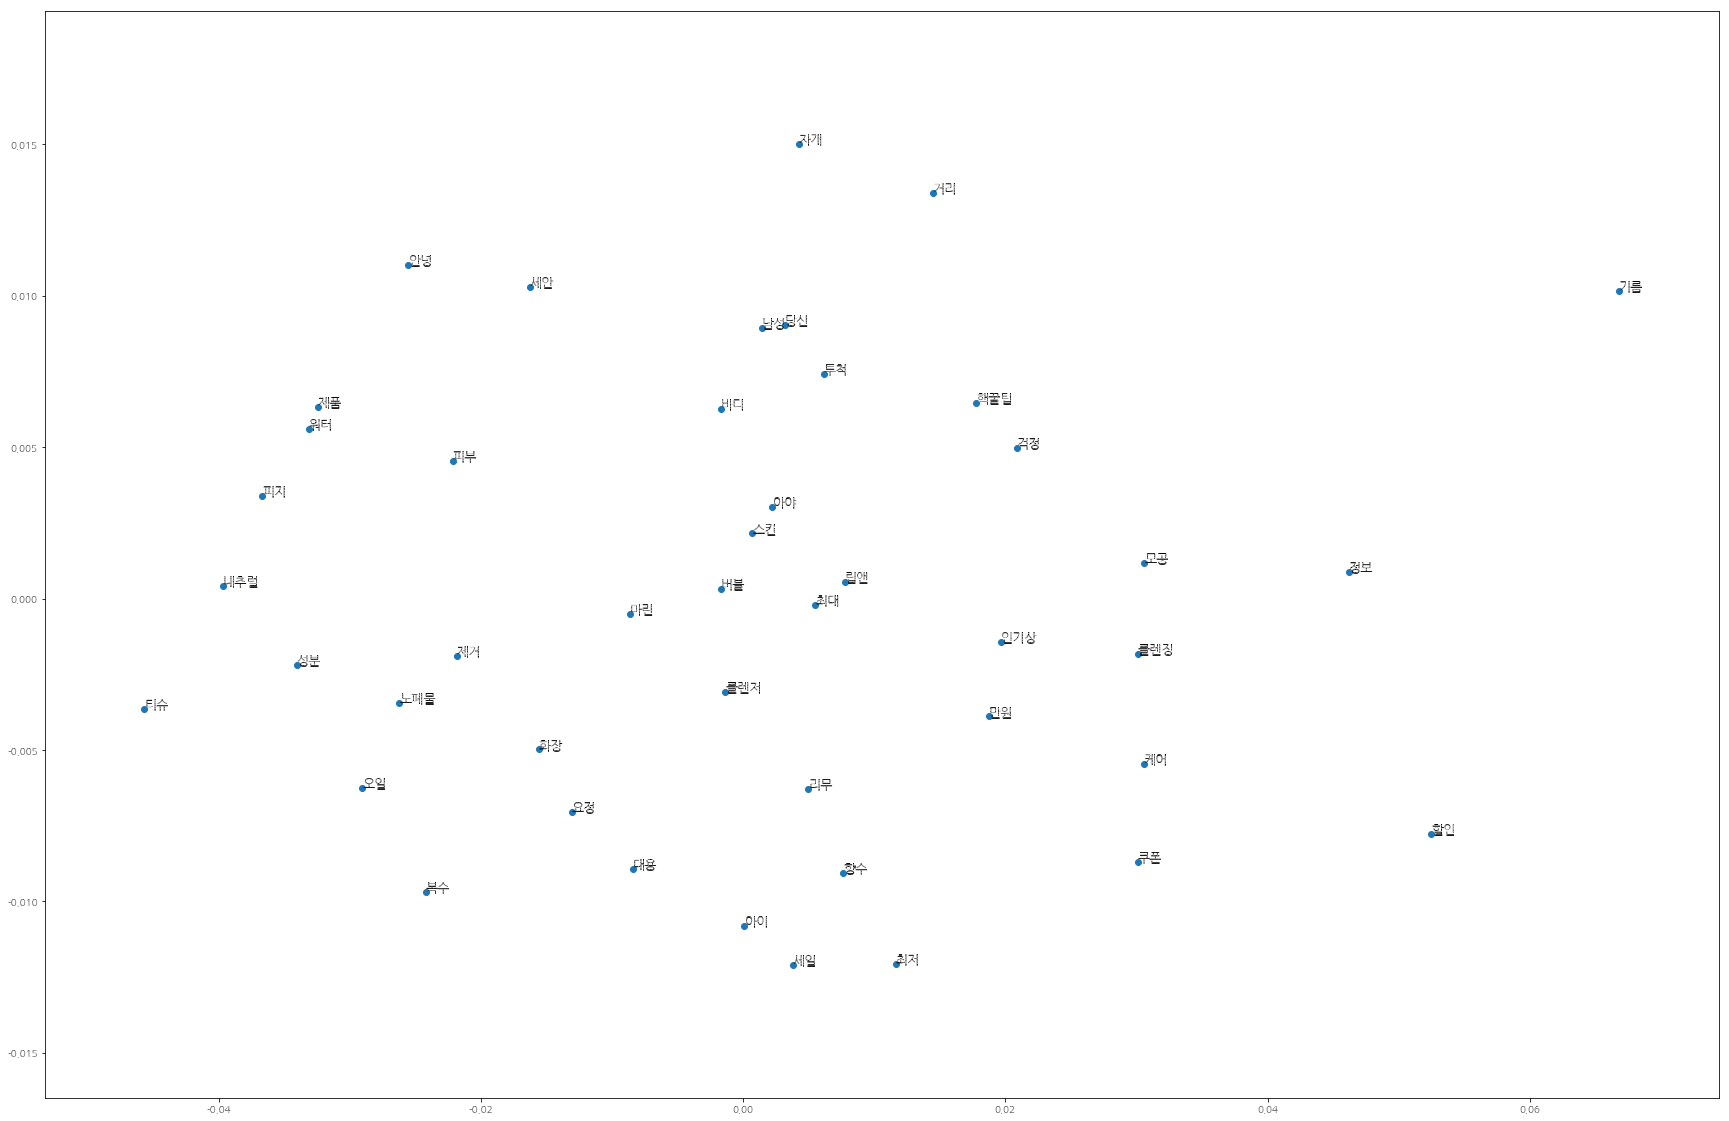

In [33]:
# 클렌저 (높은 온도)
plt.figure(figsize=(30, 20))
plt.scatter(result[:, 0], result[:, 1])

words = list(word2vec_model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=13)
plt.show()

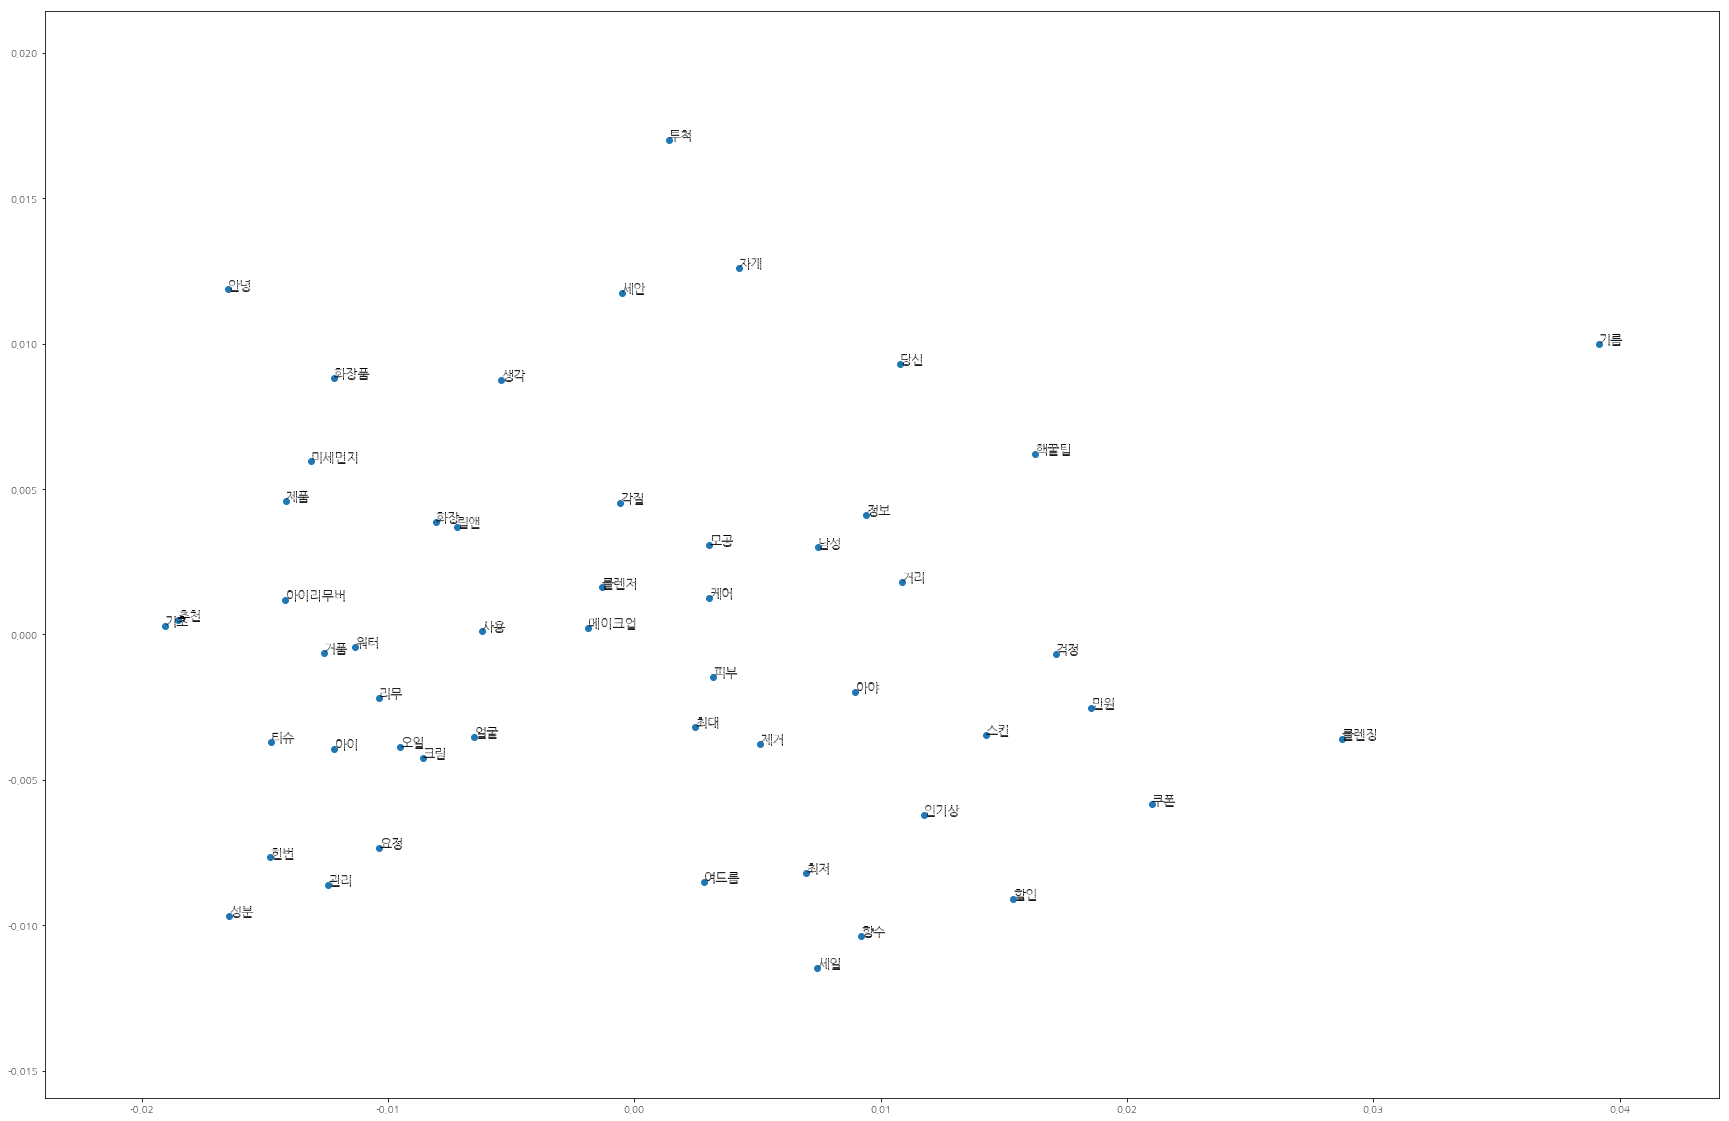

In [46]:
# 클렌저 (낮은 온도)
plt.figure(figsize=(30, 20))
plt.scatter(result[:, 0], result[:, 1])

words = list(word2vec_model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=13)
plt.show()

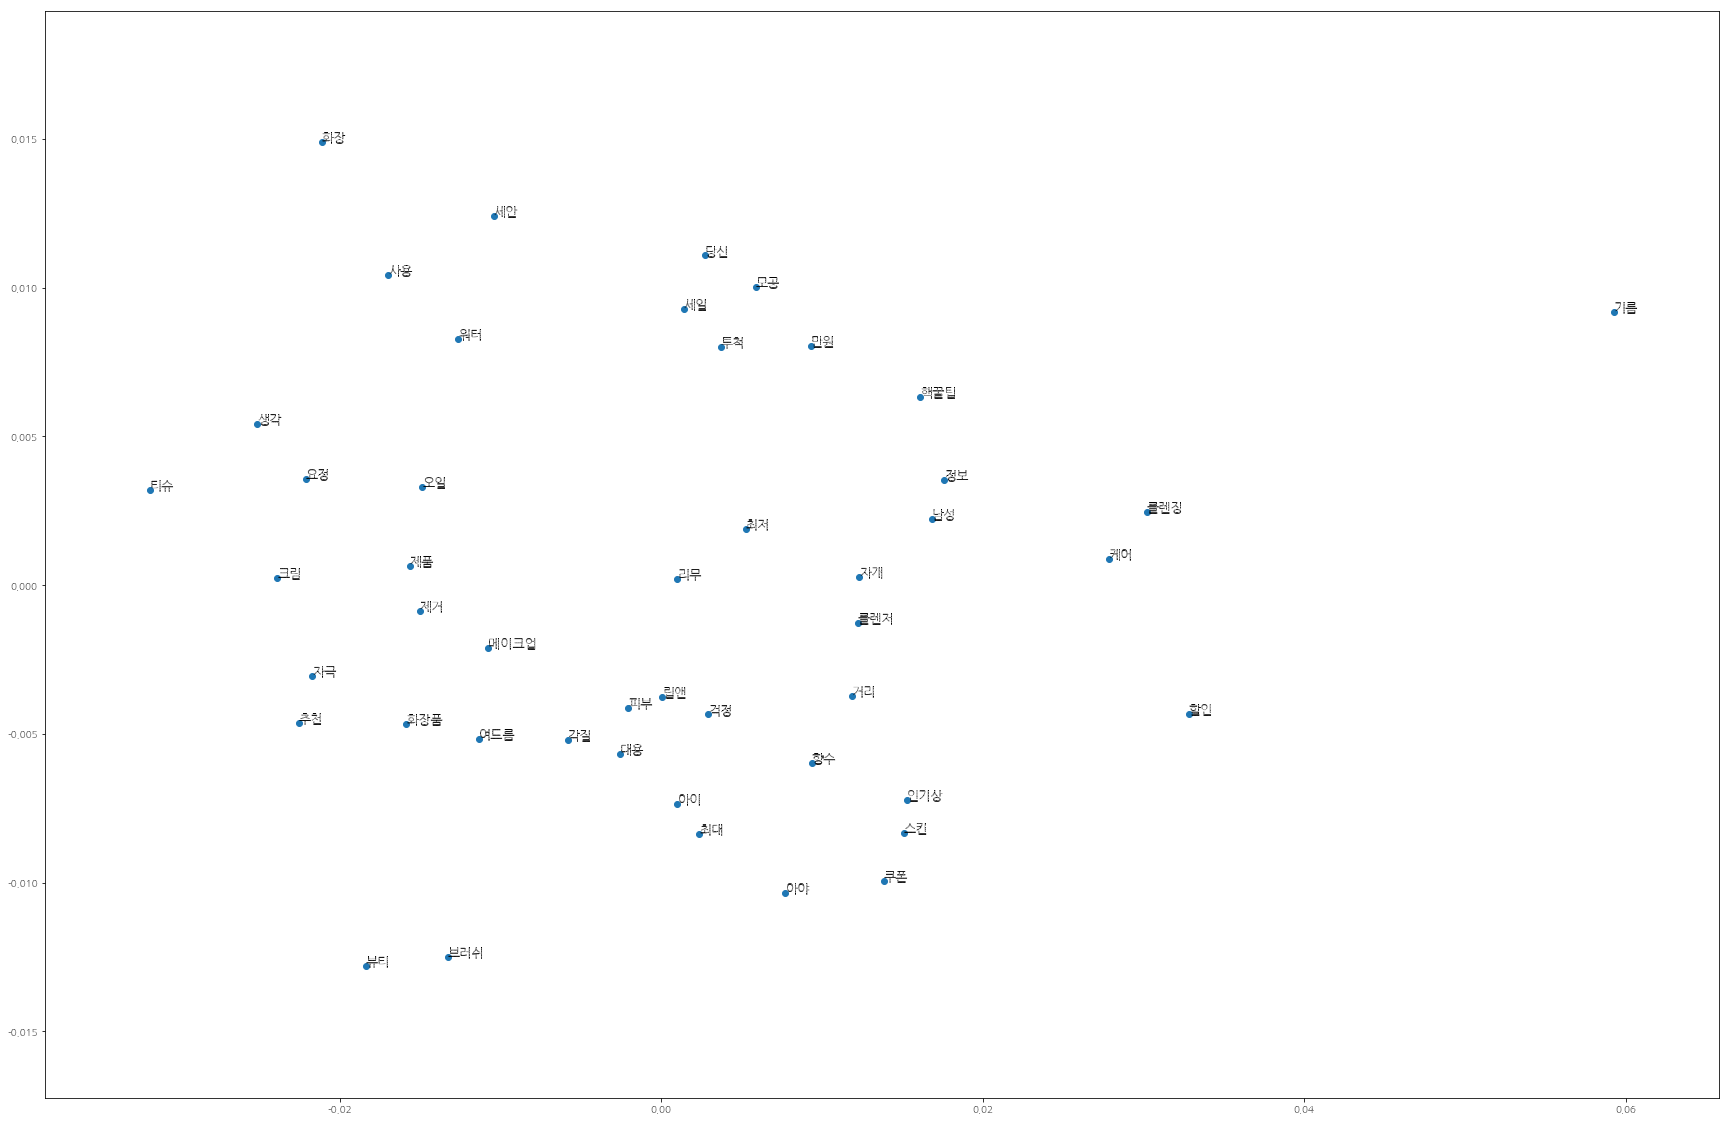

In [53]:
# 클렌저 (높은 습도)
plt.figure(figsize=(30, 20))
plt.scatter(result[:, 0], result[:, 1])

words = list(word2vec_model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=13)
plt.show()

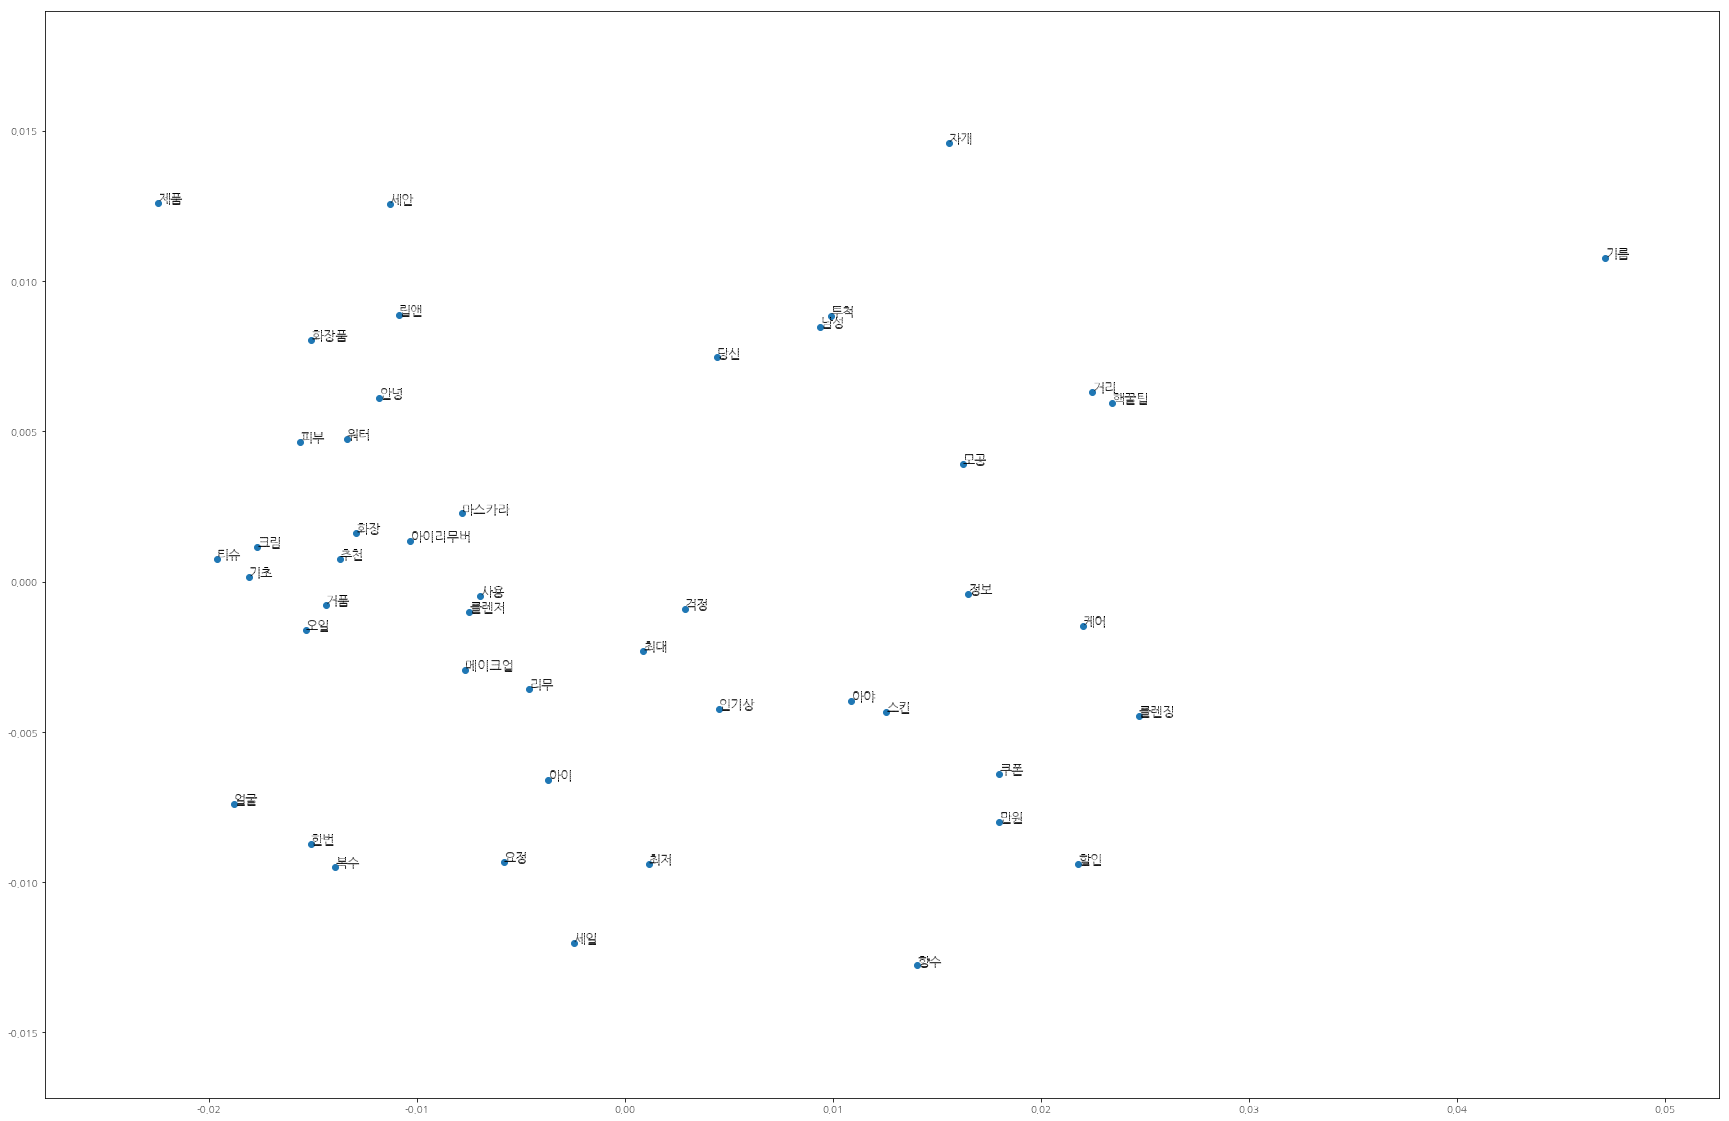

In [61]:
# 클렌저 (낮은 습도)
plt.figure(figsize=(30, 20))
plt.scatter(result[:, 0], result[:, 1])

words = list(word2vec_model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=13)
plt.show()

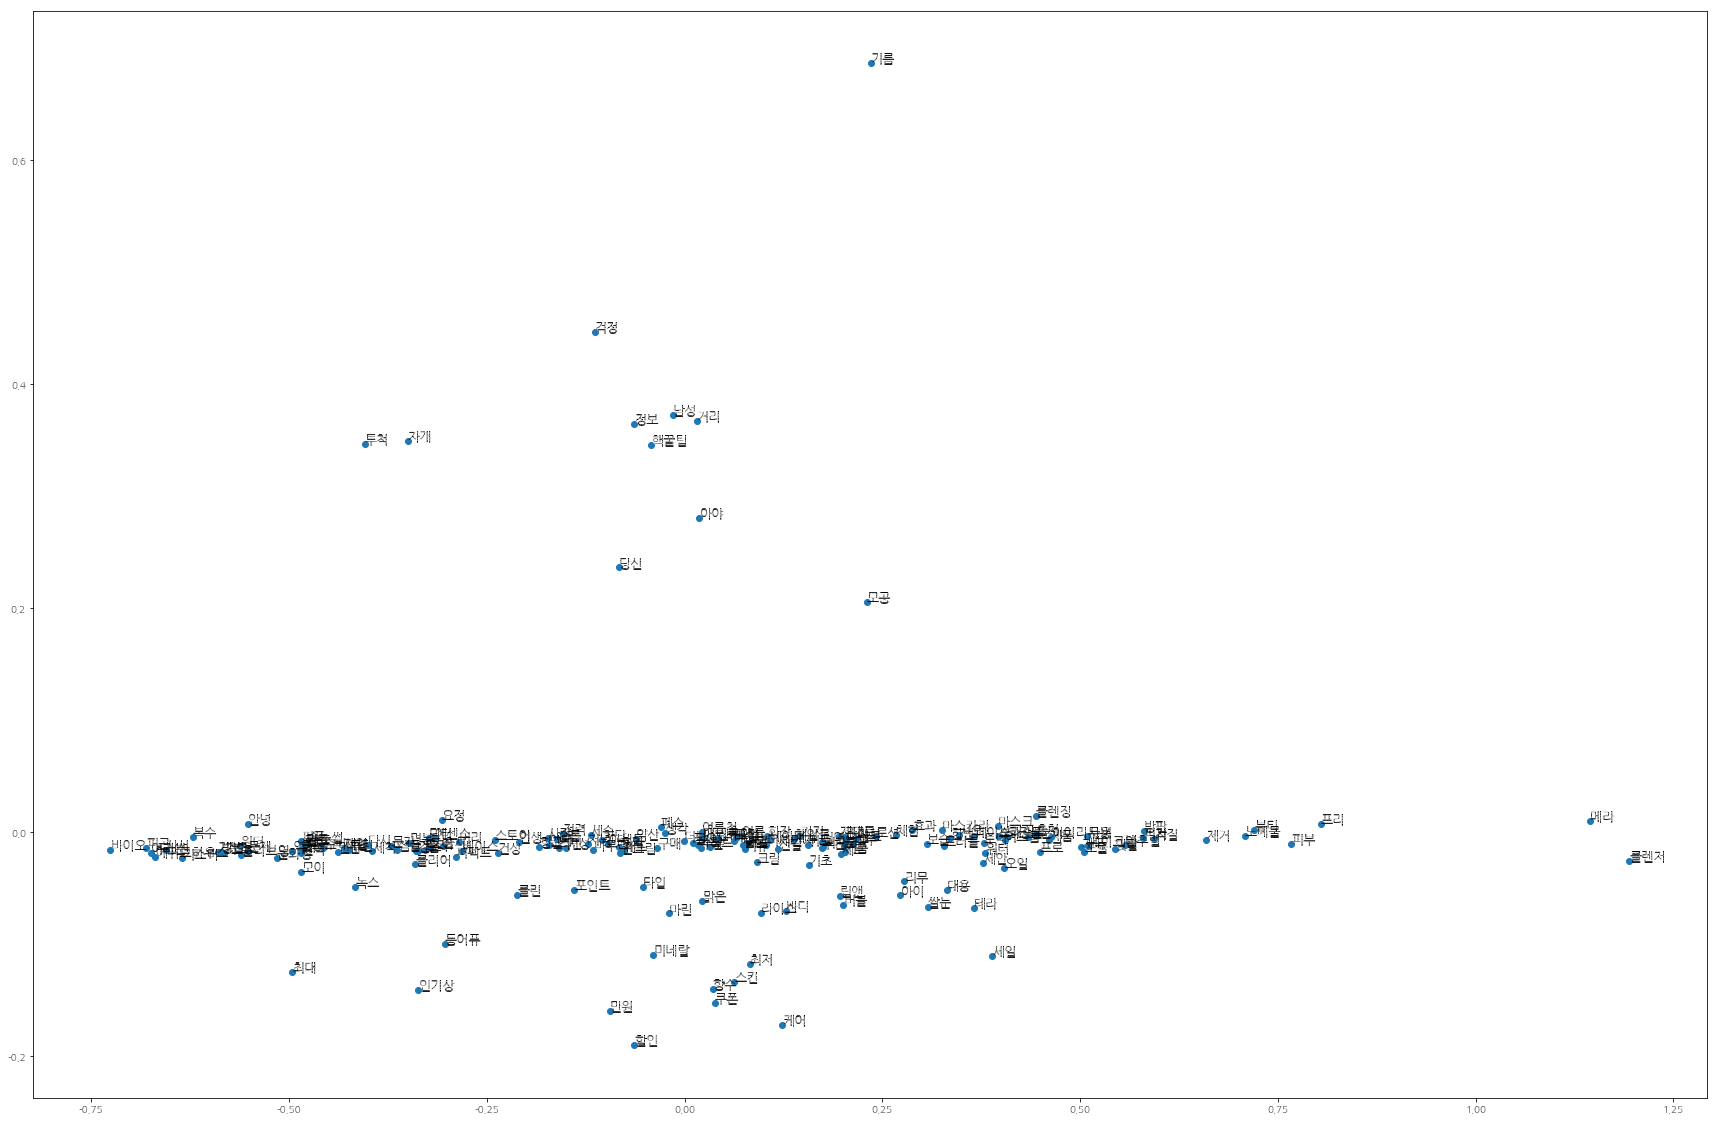

In [68]:
# 클렌저 (비오는 날)
plt.figure(figsize=(30, 20))
plt.scatter(result[:, 0], result[:, 1])

words = list(word2vec_model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=13)
plt.show()